<a href="https://colab.research.google.com/github/exponentialR/DeepLearningFundamentals/blob/main/ANN_for_handwriting_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf   #import tensorflow

In [ ]:
#Load the data

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print ("x_train.shape is: ", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape is:  (60000, 28, 28)


In [ ]:
#Build the model

model = tf.keras.models.Sequential([   #
  tf.keras.layers.Flatten(input_shape = (28, 28)), #converts the data from Nx28x28 to Nx784, that is to a 2 dimensional Matrix
  tf.keras.layers.Dense(128, activation ='relu'), #The Dense layer represents the actual layer of the Neuro networks  it does a linear transformation with 128 output
  tf.keras.layers.Dropout(0.2), #Dropout regularization, with a probability of 20%
  tf.keras.layers.Dense(10, activation='softmax') #Then another Dense layer over the 10 output classes (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

])

In [ ]:
#Compile the model

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [ ]:
#Train the model 

r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2989 - accuracy: 0.9139 - val_loss: 0.1469 - val_accuracy: 0.9572
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1410 - accuracy: 0.9580 - val_loss: 0.1073 - val_accuracy: 0.9675
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1068 - accuracy: 0.9678 - val_loss: 0.0833 - val_accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0875 - accuracy: 0.9730 - val_loss: 0.0806 - val_accuracy: 0.9759
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0741 - accuracy: 0.9769 - val_loss: 0.0729 - val_accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0655 - accuracy: 0.9794 - val_loss: 0.0721 - val_accuracy: 0.9784
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0592 - accuracy: 0.9803 - val_loss: 0.0678 - val_accuracy:

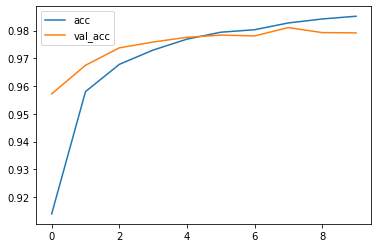

In [ ]:
#Plot accuracy per iteration of the model 

import matplotlib.pyplot as plt 
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

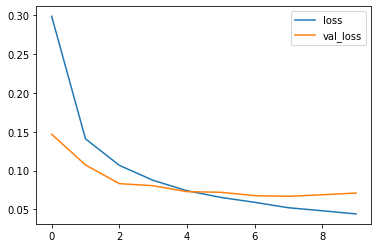

In [ ]:
#Plot loss per iteration

plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()

In [ ]:
#Evaluate the model
print (model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0712 - accuracy: 0.9792
[0.07117089629173279, 0.979200005531311]


Confusion matrix, without normalization
[[ 974    1    1    1    0    0    1    1    1    0]
 [   0 1128    3    0    0    0    2    0    2    0]
 [   5    4 1008    2    4    0    2    3    4    0]
 [   0    0    6  990    0    1    0    4    2    7]
 [   1    0    1    0  960    0    5    3    2   10]
 [   2    0    0   11    1  865    3    0    7    3]
 [   8    3    1    1    5    2  935    0    3    0]
 [   3    6    8    1    3    0    0  992    3   12]
 [   5    0    3    6    2    2    0    1  951    4]
 [   1    2    0    2   10    2    0    3    0  989]]


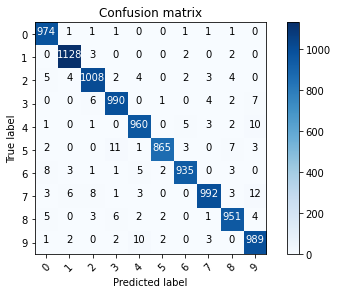

In [21]:
#Plot the confusion matrix 
from sklearn.metrics import confusion_matrix 
import numpy as np
import itertools 

def plot_confusion_matrix ( cm, classes, 
                           normalize = False, 
                           title = 'Confusion matrix', 
                           cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matric. 
  Normalization can be applied by setting using 'normalize = True'

  """
  if normalize:
      cm = cm.astype('float')/cm.sum(axis =1)[:, npnewaxis]
      print ("Normalized confusion matrix")
  else:
      print ('Confusion matrix, without normalization')
  
  print (cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.

  for i, j in itertools.product(range(cm.shape[0]), range (cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment = 'center',
              color="white" if cm [i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))
  

Text(0.5, 1.0, 'True label: 7 Predicted: 9')

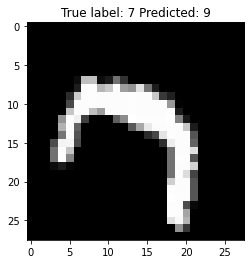

In [32]:
#Plot some of the misclassified examples 

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))
